In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
from PIL import Image
import csv

import pandas as pd


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


import tensorflow.keras as keras

import warnings
warnings.filterwarnings('ignore')



In [2]:
data=pd.read_csv('F:\Sem-5\SGP\source\data2.csv')

data.head(300)

,File-name,chroma_shft,rmse,spec_cent,spec_bw,rolloff,zcr,MFCC--1,MFCC--2,MFCC--3,...,MFCC--12,MFCC--13,MFCC--14,MFCC--15,MFCC--16,MFCC--17,MFCC--18,MFCC--19,MFCC--20,Lable
0,rock.00008.wav,0.408748,0.260914,1717.312205,1842.500561,3362.721333,0.084981,-14.910254,138.420124,-41.889428,...,12.247996,-5.819694,9.968250,-3.163116,1.976028,-6.923686,3.121398,-2.987225,-6.677925,Rock
1,rock.00001.wav,0.365525,0.180543,1529.345464,1845.423388,3271.663550,0.054982,-111.136301,134.159482,-24.647956,...,9.939369,-4.665001,3.626334,-5.541119,3.364801,-4.942521,-1.472867,0.100885,-5.332559,Rock
2,rock.00005.wav,0.376780,0.203785,1542.205910,1591.924670,2870.199311,0.077020,-62.348380,153.770773,-55.112845,...,7.204514,-2.524919,4.834071,-6.272217,-0.725831,-2.277204,-5.243365,-5.218907,-6.279709,Rock
3,rock.00006.wav,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,Rock
4,rock.00003.wav,0.380017,0.151226,1421.568971,1902.883344,3042.739934,0.043097,-156.602967,130.686506,-1.457021,...,11.535877,-3.217205,5.065080,-1.784673,3.535590,-2.447573,-0.717627,-1.413266,0.637624,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,pop.00095.wav,0.365712,0.303920,3046.148817,3306.480614,7384.647013,0.106394,-36.622723,73.082171,39.133504,...,-3.155387,-5.774647,-7.681010,-7.607766,-6.850216,-6.112240,-1.564934,2.133322,-1.562207,Pop
296,pop.00098.wav,0.399895,0.213083,3634.050584,3134.249724,7534.687772,0.183106,-26.902570,46.710707,8.701760,...,1.253731,3.836709,4.690396,1.714553,-0.980313,-1.300124,-2.687255,-1.269861,-2.485296,Pop
297,pop.00096.wav,0.339957,0.251243,3126.533643,3162.743738,6931.233088,0.105346,-59.099176,60.976773,27.745595,...,-2.403196,-4.513487,3.468001,2.026163,3.719552,2.489373,1.276359,3.131913,1.647612,Pop
298,pop.00091.wav,0.424473,0.265422,3696.225140,3246.695112,7871.035738,0.166830,-8.384624,41.998152,8.295316,...,-0.656881,-2.429781,-1.472319,-3.762977,-1.658407,-2.379022,0.052522,-0.989721,-2.601742,Pop


In [3]:
data.shape

(999, 28)

In [4]:
y=data.iloc[:,-1].values
le=LabelEncoder()
y=le.fit_transform(y)

In [5]:
print(y[500])



4


In [6]:
data.tail(100)

,File-name,chroma_shft,rmse,spec_cent,spec_bw,rolloff,zcr,MFCC--1,MFCC--2,MFCC--3,...,MFCC--12,MFCC--13,MFCC--14,MFCC--15,MFCC--16,MFCC--17,MFCC--18,MFCC--19,MFCC--20,Lable
899,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,Blues
900,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,Blues
901,blues.00007.wav,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,...,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,Blues
902,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,Blues
903,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,blues.00098.wav,0.442972,0.125422,2310.280604,2206.710936,4829.320798,0.128426,-90.677485,100.093133,-23.916267,...,12.988067,-11.415392,2.906069,-12.012914,4.822585,-11.156674,1.159210,-3.913956,3.250427,Blues
995,blues.00097.wav,0.375158,0.198282,1236.574280,1602.309124,2604.150920,0.044626,-148.639173,145.746311,-9.363639,...,3.230693,-0.667060,-0.727791,-6.821160,-3.942547,-15.739370,-5.604688,-5.802770,-0.048729,Blues
996,blues.00095.wav,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,...,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,Blues
997,blues.00094.wav,0.376687,0.141018,1239.337228,1659.466470,2517.618110,0.050908,-206.278431,126.627468,10.585205,...,3.659409,-1.448481,-1.695150,-7.157464,1.171114,-6.221975,0.600703,-1.605095,-0.528774,Blues


In [7]:
x=data.iloc[:,1:-1].values
sc=StandardScaler()

x=sc.fit_transform(x)

print(x)
print(x.shape)

[[ 0.36718559  1.97962866 -0.67767556 ...  0.67519091 -0.17548743
  -1.45493329]
 [-0.16222343  0.75590734 -0.9402859  ... -0.51241416  0.6467968
  -1.10435347]
 [-0.02436844  1.10977802 -0.92231843 ... -1.48707773 -0.76972713
  -1.35116472]
 ...
 [-0.10774666  0.85647708 -1.13720964 ... -1.67412392 -0.12089117
  -1.40700574]
 [-0.02550897  0.15409888 -1.34545949 ...  0.0235979   0.19253815
   0.14743171]
 [-1.44769992 -1.21118362 -1.49494558 ...  0.27280724  0.85716693
  -1.78911837]]
(999, 26)


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.125,random_state=1)





'''x_train= np.reshape(x_train, ((-1, 599, 20, 1)))
x_test= np.reshape(x_test, ((-1, 250, 20, 1)))
x_validation= np.reshape(x_validation, ((-1, 150, 20, 1)))'''



'x_train= np.reshape(x_train, ((-1, 599, 20, 1)))\nx_test= np.reshape(x_test, ((-1, 250, 20, 1)))\nx_validation= np.reshape(x_validation, ((-1, 150, 20, 1)))'

In [9]:
print(x_train.shape[0])
print(x_validation.shape)
print(x_test.shape)


##input_siz=(x_train.shape[1],x_train.shape[2],1)





699
(100, 26)
(200, 26)


In [10]:
#BUILDING THE CNN

model=keras.Sequential()


#layer 1
##model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_siz))
#model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
#model.add(keras.layers.BatchNormalization())



#layer 2
'''model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())



#layer 3
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model.add(keras.layers.BatchNormalization())

#flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(10, activation='softmax'))'''
##model.add(keras.layers.Flatten(input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),input_shape=(x_train.shape[1],)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(10, activation='softmax'))


In [11]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [12]:
#train the CNN

history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size=256, epochs=200)




Epoch 1/200
3/3 [==============================] - ETA: 0s - loss: 2.9778 - accuracy: 0.12 - 0s 119ms/step - loss: 2.9399 - accuracy: 0.1488 - val_loss: 2.8014 - val_accuracy: 0.2800
Epoch 2/200
3/3 [==============================] - ETA: 0s - loss: 2.8281 - accuracy: 0.19 - ETA: 0s - loss: 2.7792 - accuracy: 0.24 - 0s 40ms/step - loss: 2.7792 - accuracy: 0.2432 - val_loss: 2.7057 - val_accuracy: 0.2800
Epoch 3/200
3/3 [==============================] - ETA: 0s - loss: 2.7042 - accuracy: 0.33 - 0s 26ms/step - loss: 2.6791 - accuracy: 0.3033 - val_loss: 2.6135 - val_accuracy: 0.2700
Epoch 4/200
3/3 [==============================] - ETA: 0s - loss: 2.5220 - accuracy: 0.39 - 0s 23ms/step - loss: 2.5627 - accuracy: 0.3348 - val_loss: 2.5306 - val_accuracy: 0.2800
Epoch 5/200
3/3 [==============================] - ETA: 0s - loss: 2.4471 - accuracy: 0.38 - 0s 45ms/step - loss: 2.4814 - accuracy: 0.3605 - val_loss: 2.4369 - val_accuracy: 0.2800
Epoch 6/200
3/3 [==============================

3/3 [==============================] - ETA: 0s - loss: 1.1909 - accuracy: 0.75 - ETA: 0s - loss: 1.2789 - accuracy: 0.71 - 0s 29ms/step - loss: 1.2789 - accuracy: 0.7182 - val_loss: 1.6151 - val_accuracy: 0.6000
Epoch 46/200
3/3 [==============================] - ETA: 0s - loss: 1.2119 - accuracy: 0.74 - 0s 21ms/step - loss: 1.1955 - accuracy: 0.7468 - val_loss: 1.6213 - val_accuracy: 0.5800
Epoch 47/200
3/3 [==============================] - ETA: 0s - loss: 1.2018 - accuracy: 0.76 - 0s 24ms/step - loss: 1.1837 - accuracy: 0.7639 - val_loss: 1.6623 - val_accuracy: 0.6000
Epoch 48/200
3/3 [==============================] - ETA: 0s - loss: 1.2086 - accuracy: 0.75 - 0s 24ms/step - loss: 1.1924 - accuracy: 0.7496 - val_loss: 1.6440 - val_accuracy: 0.5900
Epoch 49/200
3/3 [==============================] - ETA: 0s - loss: 1.2137 - accuracy: 0.73 - ETA: 0s - loss: 1.1790 - accuracy: 0.74 - 0s 38ms/step - loss: 1.1790 - accuracy: 0.7454 - val_loss: 1.5826 - val_accuracy: 0.6000
Epoch 50/200
3

3/3 [==============================] - ETA: 0s - loss: 0.7430 - accuracy: 0.91 - ETA: 0s - loss: 0.7534 - accuracy: 0.90 - 0s 35ms/step - loss: 0.7534 - accuracy: 0.9070 - val_loss: 1.5771 - val_accuracy: 0.6200
Epoch 88/200
3/3 [==============================] - ETA: 0s - loss: 0.7476 - accuracy: 0.91 - 0s 44ms/step - loss: 0.7390 - accuracy: 0.8970 - val_loss: 1.5509 - val_accuracy: 0.6100
Epoch 89/200
3/3 [==============================] - ETA: 0s - loss: 0.7658 - accuracy: 0.90 - 0s 26ms/step - loss: 0.7502 - accuracy: 0.9142 - val_loss: 1.5940 - val_accuracy: 0.6300
Epoch 90/200
3/3 [==============================] - ETA: 0s - loss: 0.7513 - accuracy: 0.88 - 0s 31ms/step - loss: 0.7518 - accuracy: 0.9013 - val_loss: 1.6685 - val_accuracy: 0.6300
Epoch 91/200
3/3 [==============================] - ETA: 0s - loss: 0.7372 - accuracy: 0.91 - 0s 31ms/step - loss: 0.7343 - accuracy: 0.9084 - val_loss: 1.7129 - val_accuracy: 0.6000
Epoch 92/200
3/3 [==============================] - ETA:

Epoch 130/200
3/3 [==============================] - ETA: 0s - loss: 0.5811 - accuracy: 0.96 - 0s 30ms/step - loss: 0.5847 - accuracy: 0.9514 - val_loss: 1.7148 - val_accuracy: 0.6300
Epoch 131/200
3/3 [==============================] - ETA: 0s - loss: 0.5819 - accuracy: 0.94 - 0s 27ms/step - loss: 0.5779 - accuracy: 0.9514 - val_loss: 1.7508 - val_accuracy: 0.6500
Epoch 132/200
3/3 [==============================] - ETA: 0s - loss: 0.5606 - accuracy: 0.94 - 0s 27ms/step - loss: 0.5399 - accuracy: 0.9585 - val_loss: 1.8081 - val_accuracy: 0.6300
Epoch 133/200
3/3 [==============================] - ETA: 0s - loss: 0.5407 - accuracy: 0.96 - 0s 27ms/step - loss: 0.5485 - accuracy: 0.9599 - val_loss: 1.8120 - val_accuracy: 0.6300
Epoch 134/200
3/3 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.92 - 0s 27ms/step - loss: 0.5700 - accuracy: 0.9514 - val_loss: 1.7277 - val_accuracy: 0.6400
Epoch 135/200
3/3 [==============================] - ETA: 0s - loss: 0.5412 - ac

Epoch 173/200
3/3 [==============================] - ETA: 0s - loss: 0.4801 - accuracy: 0.96 - ETA: 0s - loss: 0.4827 - accuracy: 0.96 - 0s 34ms/step - loss: 0.4827 - accuracy: 0.9628 - val_loss: 1.9403 - val_accuracy: 0.6200
Epoch 174/200
3/3 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.96 - 0s 27ms/step - loss: 0.4800 - accuracy: 0.9742 - val_loss: 1.9921 - val_accuracy: 0.6200
Epoch 175/200
3/3 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.97 - ETA: 0s - loss: 0.4696 - accuracy: 0.97 - 0s 36ms/step - loss: 0.4696 - accuracy: 0.9700 - val_loss: 1.9700 - val_accuracy: 0.6300
Epoch 176/200
3/3 [==============================] - ETA: 0s - loss: 0.4874 - accuracy: 0.96 - ETA: 0s - loss: 0.4754 - accuracy: 0.96 - 0s 45ms/step - loss: 0.4754 - accuracy: 0.9642 - val_loss: 1.9414 - val_accuracy: 0.6300
Epoch 177/200
3/3 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.96 - 0s 26ms/step - loss: 0.4598 - accuracy: 0.9

In [13]:
test_error,test_accuracy=model.evaluate(x_test,y_test)
print(test_accuracy)

7/7 [==============================] - ETA: 0s - loss: 1.1913 - accuracy: 0.78 - 0s 6ms/step - loss: 1.6006 - accuracy: 0.7150
0.7149999737739563


In [14]:
print(test_accuracy)

0.7149999737739563


In [15]:
results = model.evaluate(x_test, y_test)


7/7 [==============================] - ETA: 0s - loss: 1.1913 - accuracy: 0.78 - 0s 4ms/step - loss: 1.6006 - accuracy: 0.7150


In [16]:
print(results)

[1.6005964279174805, 0.7149999737739563]


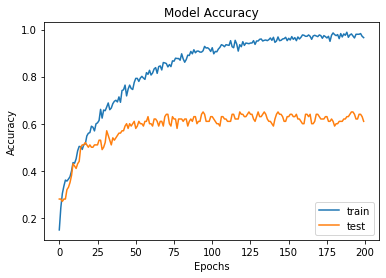

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","test"],loc="lower right")
plt.show()

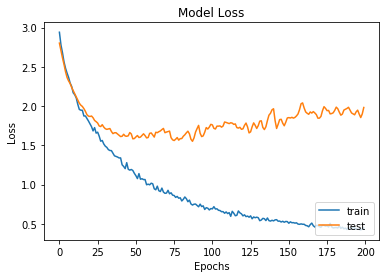

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","test"],loc="lower right")
plt.show()

In [58]:
model.save("F:\\Sem-5\\SGP\\source\\my_model2.h5")


In [97]:
import pickle
with open('F:\\Sem-5\\SGP\\source\\my_model3.pkl', 'wb') as fid:
    pickle.dump(model, fid)

TypeError: can't pickle _thread.RLock objects

In [18]:
model=keras.models.load_model('F:\\Sem-5\\SGP\\source\\my_model2.h5')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 186,954
Trainable params: 186,954
Non-trainable params: 0
_________________________________________________________________


In [19]:
stfl_results = model.evaluate(x_test, y_test)

7/7 [==============================] - ETA: 0s - loss: 0.9670 - accuracy: 0.18 - 0s 3ms/step - loss: 1.5423 - accuracy: 0.1200


In [16]:
print(x_test[0.

p=[x_test[0]]

print(p)

[ 1.36845703  1.99251098  0.7079924   0.50941625  0.7763657   0.50071345
  1.32529262 -0.56007946  0.01889495  0.98855615 -1.11029317  1.46404319
 -1.46507038  1.21952488 -0.93193225  0.85497715 -0.59818026  1.41959715
 -0.53184807  1.13026475 -0.33417671  2.55602716  0.05912829  1.4804646
 -0.06807845  0.31600732]
[array([ 1.36845703,  1.99251098,  0.7079924 ,  0.50941625,  0.7763657 ,
        0.50071345,  1.32529262, -0.56007946,  0.01889495,  0.98855615,
       -1.11029317,  1.46404319, -1.46507038,  1.21952488, -0.93193225,
        0.85497715, -0.59818026,  1.41959715, -0.53184807,  1.13026475,
       -0.33417671,  2.55602716,  0.05912829,  1.4804646 , -0.06807845,
        0.31600732])]


In [17]:
intz=[[ 1.32529262, -0.56007946,  0.01889495,  0.98855615, -1.11029317,
        1.46404319, -1.46507038,  1.21952488, -0.93193225,  0.85497715,
       -0.59818026,  1.41959715, -0.53184807,  1.13026475, -0.33417671,
        2.55602716,  0.05912829,  1.4804646 , -0.06807845,  0.31600732]]
a=np.array(intz)
print(a)
print(len(intz))
print(a.shape)

[[ 1.32529262 -0.56007946  0.01889495  0.98855615 -1.11029317  1.46404319
  -1.46507038  1.21952488 -0.93193225  0.85497715 -0.59818026  1.41959715
  -0.53184807  1.13026475 -0.33417671  2.55602716  0.05912829  1.4804646
  -0.06807845  0.31600732]]
1
(1, 20)


(1, 26)
[[-1.22962211 -0.81895141 -1.40257078 -1.27145623 -1.33102626 -1.23643636
  -1.40013894  0.29433228  0.83235931  0.89693713  1.576993   -0.59222752
   1.39887731 -0.74196651  0.84750119 -0.69258869  1.49798063 -1.15860228
   1.03910902  0.1814579   1.4880026   0.46799179 -0.12270291 -0.00328123
   2.19680333  1.12287617]]
The genre for this song is Blues


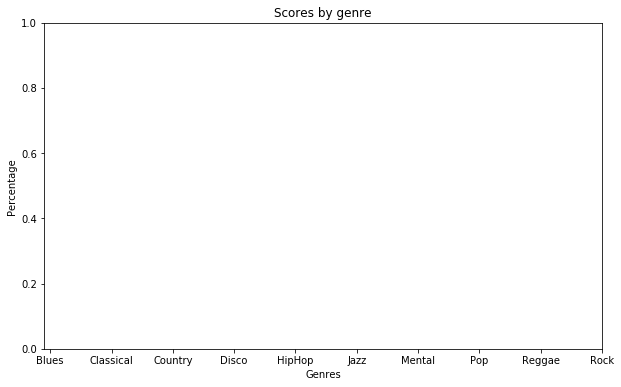

In [27]:
from sklearn.preprocessing import StandardScaler
q=StandardScaler()
dhruv=q.fit(x)

new_song='F:\\Sem-5\\SGP\\Data\\genres_original\\blues\\blues.00026.wav'
new_signal,sr=librosa.load(new_song,duration=60)
f1 = librosa.feature.mfcc(new_signal,sr=sr)
f2 = librosa.feature.rms(y=new_signal)
f3 = librosa.feature.spectral_centroid(y=new_signal, sr=sr)
f4 = librosa.feature.spectral_bandwidth(y=new_signal, sr=sr)
f5 = librosa.feature.spectral_rolloff(y=new_signal, sr=sr)
f6 = librosa.feature.zero_crossing_rate(new_signal)
f7 = librosa.feature.chroma_stft(y=new_signal, sr=sr)

##print(mfccs)
##print(mfccs.shape)

##librosa.display.specshow(mfccs, sr=sr,x_axis='time')
##plt.xlabel("Time") 
##plt.ylabel("MFCC")
##plt.colorbar()
##plt.show()
new=[]
new.append(np.mean(f7))
new.append(np.mean(f2))
new.append(np.mean(f3))
new.append(np.mean(f4))
new.append(np.mean(f5))
new.append(np.mean(f6))



for e in f1:
  new.append(np.mean(e))

##print(to)
final_new=[new]
##print(arr)
#print(final_new)
#abcd=q.fit_transform(final_new)
final_new=np.array(final_new)
final_pree= model.predict(sc.transform(final_new))
##print(predictions.shape)
#print(abcd)
#print(abc)
print(final_new.shape)
print(sc.transform(final_new))
r=np.argmax(final_pree)
#print(final_pre)
#print(r)
if r==0:
  print("The genre for this song is Blues")
elif r==1:
  print("The genere for this song is Classical")
elif r==2:
  print("The genere for this song is Country")
elif r==3:
  print("The genere for this song is Disco")
elif r==4:
  print("The genere for this song is HipHop")
elif r==5:
  print("The genere for this song is Jazz")
elif r==6:
  print("The genere for this song is Mental")
elif r==7:
  print("The genere for this song is Pop")
elif r==8:
  print("The genere for this song is Reggae")
elif r==9:
  print("The genere for this song is Rock")
tags = ['Blues', 'Classical', 'Country', 'Disco', 'HipHop', 'Jazz', 'Mental', 'Pop', 'Reggae', 'Rock']
tags = np.array(tags)

colors = ['b','g','c','r','m','k','y','#ff1122','#5511ff','#44ff22']
fig, ax = plt.subplots()
index = np.arange(tags.shape[0])
opacity = 1
bar_width = 0.2
mean=final_pree.flatten() 
#for g in rini_array1.flatten() ange(0, tags.shape[0]):
plt.bar(x=index, height=mean, width=bar_width, alpha=opacity, color=colors)
plt.rcParams["figure.figsize"] = (10, 6)

plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Scores by genre')
plt.xticks(index + bar_width / 2, tags)
plt.tight_layout()
fig.autofmt_xdate()

xq=plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[8.9392155e-01 7.6334300e-07 1.3850715e-04 3.6226543e-06 3.9992632e-05
 1.4229045e-05 9.3497194e-02 4.5904436e-08 1.5636053e-04 1.2227795e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [66]:
xy = stfl.predict(x_test)
##print(predictions.shape)
print(x[0])
print(x_test.shape)

result=np.argmax(xy[46])
print(result)
print(y_test[46])

[3.0959552e-02 9.6213451e-05 1.5980161e-03 7.2204566e-06 4.3926738e-02
 1.4207023e-06 9.2332429e-01 8.0238993e-07 4.3627701e-06 8.1381419e-05]
(200, 26)
4
4


In [21]:
print(x_train[0])

[-1.14932676 -0.36938858 -1.29362571 -1.27794991 -1.3368958  -1.24743132
 -0.53818708  1.31463079 -0.43809375 -0.34768262 -0.45459152  0.09148493
  0.44185904 -0.27077315  0.04985323 -0.20879338  0.13097113 -0.15225097
  0.3170161   1.07836792  0.73226117 -0.69215043  1.55899013  0.09146922
  1.02429022  0.22407785]


In [22]:
new_arr=data.iloc[:,7:-1].values
new_lable=data.iloc[:,0:1].values
a=new_arr.mean(axis=1)
print(new_lable[0][0])
print(a[0])
new_arr[0].shape

rock.00008.wav
5.135138930501756


(20,)

In [ ]:
head=["File-Name","Rating"]
with open('data3.csv','w',newline='') as files:
    thewriter=csv.writer(files)

    thewriter.writerow(head)
for i in range(0,999):
    row=[]
    row.append(new_lable[i][0])
    row.append(a[i])
    
    with open('data3.csv','a',newline='') as files:
        writer=csv.writer(files)
        writer.writerow(row)


In [ ]:
new_data2=pd.DataFrame(data.groupby("File-name") ["new_arr"])
new_data2

In [ ]:
new_data=pd.DataFrame(data.groupby('File-name')["zcr"].mean())
new_data

In [23]:
data2=pd.read_csv('F:\Sem-5\SGP\source\data3.csv')
data2.head()

,File-Name,Rating
0,rock.00008.wav,5.135139
1,rock.00001.wav,2.734301
2,rock.00005.wav,1.876016
3,rock.00006.wav,-0.998976
4,rock.00003.wav,3.532988


In [25]:
new_data3=pd.DataFrame(data2.groupby("File-Name") ["Rating"].mean())
new_data3

,Rating
File-Name,
blues.00000.wav,1.935690
blues.00001.wav,-0.058070
blues.00002.wav,1.033480
blues.00003.wav,0.078957
blues.00004.wav,-8.457873
...,...
rock.00095.wav,-1.728487
rock.00096.wav,-1.764581
rock.00097.wav,-2.667840


In [29]:
query_index1 =new_data3.index[0]
print(query_index1)


similar=new_data3.corrwith(query_index1)

blues.00000.wav


AttributeError: 'str' object has no attribute '_get_numeric_data'

In [27]:
from scipy.sparse import csr_matrix

final = csr_matrix(new_data3.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(final)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [31]:
(new_data3.iloc[query_index,:].values.reshape(1, -1))

array([[6.06585448]])

In [40]:
query_index = np.random.choice(new_data3.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(new_data3.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)

902


In [65]:
new_data3.iloc[query_index,:].values
len(distances.flatten())
new_data3.index[indices.flatten()[i]]

'hiphop.00015.wav'

In [42]:
print(distances)
print(indices)


[[0. 0. 0. 0. 0.]]
[[416 414 417 419 415]]


In [43]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(new_data3.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, new_data3.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for rock.00003.wav:

1: hiphop.00014.wav, with distance of 0.0:
2: hiphop.00017.wav, with distance of 0.0:
3: hiphop.00019.wav, with distance of 0.0:
4: hiphop.00015.wav, with distance of 0.0:


In [60]:
from pydub import AudioSegment

src="F:\\Sem-5\\SGP\\Test\\Saibon.mp3"
dest="F:\\Sem-5\\SGP\\Test\\song1.wav"

sound=AudioSegment.from_mp3(src)
sound.export(dest,format="wav")

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [46]:
!pip install pydub